In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np


#This is forJupyter notebooks.  It displays plots directly within the notebook 
#instead of opening them in a new window.

%matplotlib inline

In [3]:
# Store the data in a Pandas DataFrame

#Convert excel file generated by API to a Pandas dataframe.
df = pd.read_excel('/Users/kim/Desktop/EPA_EV_EnginePackage .xlsx').dropna()

df.head(10)


,Vehicle Type,Engine Package,Model Year,Production (000),Production Share,2-Cycle MPG,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),...,Ton-MPG (Real-World),Drivetrain - Front,Drivetrain - 4WD,Drivetrain - Rear,Transmission - Manual,Transmission - Automatic,Transmission - Lockup,Transmission - CVT (Hybrid),Transmission - Other,Transmission - CVT (Non-Hybrid)
0,Sedan/Wagon,EV/PHEV/FCV,1986,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Sedan/Wagon,EV/PHEV/FCV,1987,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,Sedan/Wagon,EV/PHEV/FCV,1988,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,Sedan/Wagon,EV/PHEV/FCV,1989,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,Sedan/Wagon,EV/PHEV/FCV,1990,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,Sedan/Wagon,EV/PHEV/FCV,1991,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,Sedan/Wagon,EV/PHEV/FCV,1992,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
7,Sedan/Wagon,EV/PHEV/FCV,1993,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
8,Sedan/Wagon,EV/PHEV/FCV,1994,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
9,Sedan/Wagon,EV/PHEV/FCV,1995,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
# Review the data types of the DataFrame using the info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Vehicle Type                         138 non-null    object
 1   Engine Package                       138 non-null    object
 2   Model Year                           138 non-null    object
 3   Production (000)                     138 non-null    object
 4   Production Share                     138 non-null    object
 5   2-Cycle MPG                          138 non-null    object
 6   Real-World MPG                       138 non-null    object
 7   Real-World MPG_City                  138 non-null    object
 8   Real-World MPG_Hwy                   138 non-null    object
 9   Real-World CO2 (g/mi)                138 non-null    object
 10  Real-World CO2_City (g/mi)           138 non-null    object
 11  Real-World CO2_Hwy (g/mi)            138 non-

In [5]:
# Create a mask where Vehicle Type column does not contain TruckSUV or Pickup
mask = ~df['Vehicle Type'].str.contains('Truck SUV|Pickup', case=False, na=False)

# Apply the mask to the DataFrame
df = df[mask]

df['Vehicle Type'].unique() 



array(['Sedan/Wagon', 'Car SUV', 'Minivan/Van'], dtype=object)

In [6]:
df

,Vehicle Type,Engine Package,Model Year,Production (000),Production Share,2-Cycle MPG,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),...,Ton-MPG (Real-World),Drivetrain - Front,Drivetrain - 4WD,Drivetrain - Rear,Transmission - Manual,Transmission - Automatic,Transmission - Lockup,Transmission - CVT (Hybrid),Transmission - Other,Transmission - CVT (Non-Hybrid)
0,Sedan/Wagon,EV/PHEV/FCV,1986,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Sedan/Wagon,EV/PHEV/FCV,1987,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,Sedan/Wagon,EV/PHEV/FCV,1988,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,Sedan/Wagon,EV/PHEV/FCV,1989,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,Sedan/Wagon,EV/PHEV/FCV,1990,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Minivan/Van,EV/PHEV/FCV,2019,3,0.006279,72.6697,44.5788,58.0509,37.9371,141.148,...,111.447,1,-,-,-,-,-,1,-,-
84,Minivan/Van,EV/PHEV/FCV,2020,8,0.020883,72.6697,44.5788,58.0509,37.9371,141.148,...,111.447,1,-,-,-,-,-,1,-,-
85,Minivan/Van,EV/PHEV/FCV,2021,19,0.063251,72.6697,44.5788,58.0509,37.9371,141.148,...,111.447,1,-,-,-,-,-,1,-,-
86,Minivan/Van,EV/PHEV/FCV,2022,18,0.048449,72.7303,44.5929,57.9275,37.9949,141.105,...,111.48225,1,-,-,-,-,-,1,-,-


In [7]:
df2 = df.copy()

# Replace 'Prelim. 2023' with '2023' in 'Model Year' and drop NaN values
df2['Model Year'] = df2['Model Year'].replace('Prelim. 2023', '2023')

df2 = df2.dropna()

# Convert 'Model Year' to integer
df2['Model Year'] = df2['Model Year'].astype(int)

# Convert columns to numeric.  Error=coerce changes any data to NaN that cannot be converted
df2['Real-World CO2 (g/mi)'] = pd.to_numeric(df2['Real-World CO2 (g/mi)'], errors='coerce')

# Sort the DataFrame by the Model Year
df3 = df2.sort_values('Model Year')

grouped_df = df3.groupby('Model Year')

grouped_df2 = grouped_df[['Real-World CO2 (g/mi)']].mean()

grouped_df2 = grouped_df2.dropna(how = 'any')

grouped_df2

,Real-World CO2 (g/mi)
Model Year,
2010,0.000000
2011,513.833485
2012,288.874543
2013,348.341117
2014,350.820413
2015,26.389005
2016,25.807635
2017,60.467980
2018,69.384767


<Axes: xlabel='Model Year'>

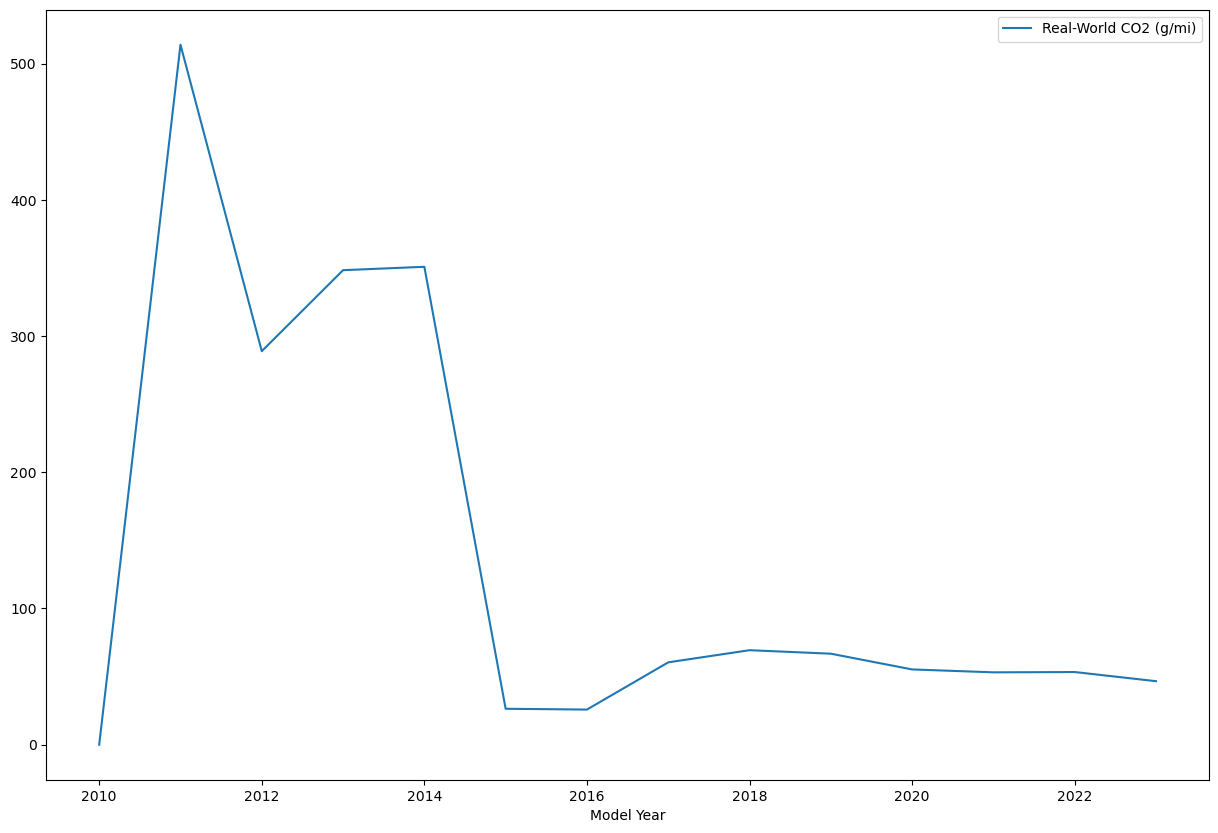

In [8]:
#Plot

grouped_df2.plot(figsize=[15,10])

In [9]:
# Prepare dataframe for prophet modeling
prep_prophet = df[['Model Year', 'Real-World CO2 (g/mi)']].copy()  # Create a copy function causes prep_prophet to be a new, separate df that won't reference the original df.  

# Replace 'Prelim. 2023' with '2023' in 'Model Year' and drop NaN values
prep_prophet['Model Year'] = prep_prophet['Model Year'].replace('Prelim. 2023', '2023')

prep_prophet2 = prep_prophet.dropna(how='any')

prep_prophet2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Model Year             88 non-null     object
 1   Real-World CO2 (g/mi)  88 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [10]:
# Rename the columns to 'ds' and 'y' for Prophet
prophet_df2 = prep_prophet2.rename(columns={'Model Year': 'ds', 'Real-World CO2 (g/mi)': 'y'})

# Exclude rows where 'y' is 0
prophet_df2 = prophet_df2[prophet_df2['y'] != 0]

# Replace non-numeric values with NaN in 'y' column
prophet_df2['y'] = pd.to_numeric(prophet_df2['y'], errors='coerce')

# Remove rows with non-finite 'y' values (NaN or inf)
prophet_df2 = prophet_df2[np.isfinite(prophet_df2['y'])]

# Convert 'y' column to integer
prophet_df2['y'] = prophet_df2['y'].astype(int)

# Convert 'ds' column to string
prophet_df2['ds'] = prophet_df2['ds'].astype(str)

# Add fake month and day, '-01-01', to 'ds' column and convert it to datetime
prophet_df2['ds'] = pd.to_datetime(prophet_df2['ds'] + '-01-01')

# Drop any rows with NaN values
prophet_df2 = prophet_df2.dropna()

# Display the first and last five rows of the DataFrame
display(prophet_df2.head())
display(prophet_df2.tail())

,ds,y
25,2011-01-01,64
26,2012-01-01,102
27,2013-01-01,72
28,2014-01-01,80
29,2015-01-01,52


,ds,y
83,2019-01-01,141
84,2020-01-01,141
85,2021-01-01,141
86,2022-01-01,141
87,2023-01-01,132


In [11]:
# Call the Prophet function, store as an object
prophet_model = Prophet()

In [12]:
# Fit the time-series model.
prophet_model.fit(prophet_df2)

21:51:47 - cmdstanpy - INFO - Chain [1] start processing
21:51:47 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 5 years
evcotwo_trends = prophet_model.make_future_dataframe(periods = 5, freq='Y')

# View the first seventeen rows of the evcotwo_trends DataFrame
display(evcotwo_trends.head(17))

,ds
0,2011-01-01
1,2012-01-01
2,2013-01-01
3,2014-01-01
4,2015-01-01
5,2016-01-01
6,2017-01-01
7,2018-01-01
8,2019-01-01
9,2020-01-01


In [14]:
# Make the predictions for the trend data using the evoctwo DataFrame
forecast_evcotwo_trends = prophet_model.predict(evcotwo_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_evcotwo_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,-46.789456,158.275658,766.515527,-46.789456,-46.789456,513.723738,513.723738,513.723738,513.723738,513.723738,513.723738,0.0,0.0,0.0,466.934283
1,2012-01-01,-90.951107,93.507980,694.557276,-90.951107,-90.951107,491.648430,491.648430,491.648430,491.648430,491.648430,491.648430,0.0,0.0,0.0,400.697324
2,2013-01-01,-135.233749,108.505467,736.325241,-135.233749,-135.233749,553.119634,553.119634,553.119634,553.119634,553.119634,553.119634,0.0,0.0,0.0,417.885885
3,2014-01-01,-179.395400,40.523768,663.565871,-179.395400,-179.395400,534.222475,534.222475,534.222475,534.222475,534.222475,534.222475,0.0,0.0,0.0,354.827075
4,2015-01-01,-223.557051,-28.541462,600.603499,-223.557051,-223.557051,513.723738,513.723738,513.723738,513.723738,513.723738,513.723738,0.0,0.0,0.0,290.166687


/Users/kim/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/kim/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


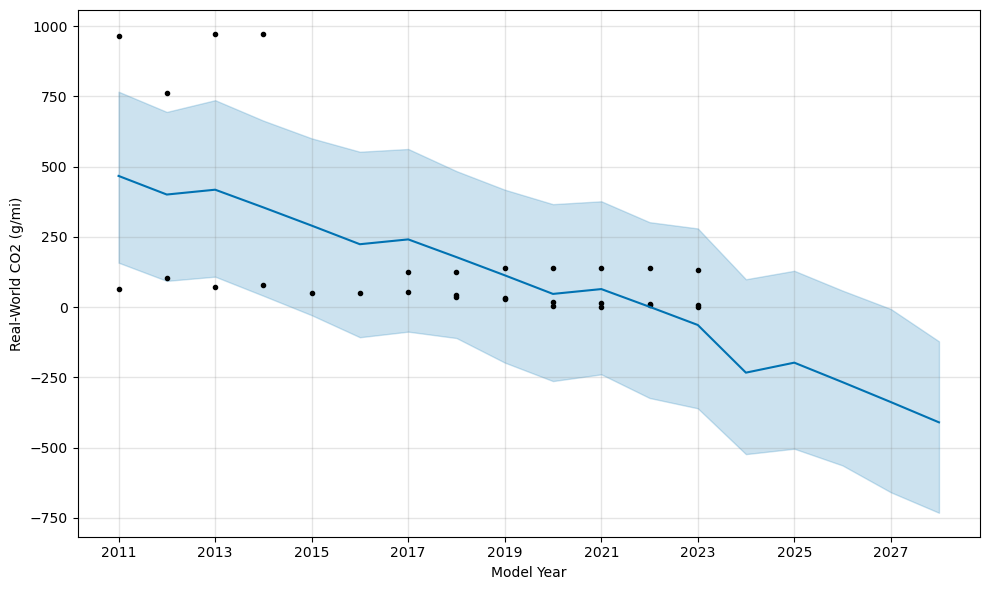

In [15]:
# Plot the Prophet predictions 
fig1 = prophet_model.plot(forecast_evcotwo_trends, xlabel='Model Year', ylabel='Real-World CO2 (g/mi)')